In [ ]:
# https://github.com/martinmorando/applied-ai/tree/main/003-light-bulb-type

In [1]:
# Ensure we are using the latest version to avoid problems
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.3/235.3 kB 5.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.3 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pylibcugraph-cu12 

Folder light-bulb-types contains 4 folders (categories):
- CFL bulb
- halogen bulb
- incandescent bulb
- LED bulb

In [2]:
from fastai.vision.all import *
path = Path("/kaggle/input/light-bulb-types")

In [3]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method="squish")]
).dataloaders(path, bs=32)

In [12]:
import timm
learn = vision_learner(dls, "convnext_base.fb_in22k", metrics=error_rate)

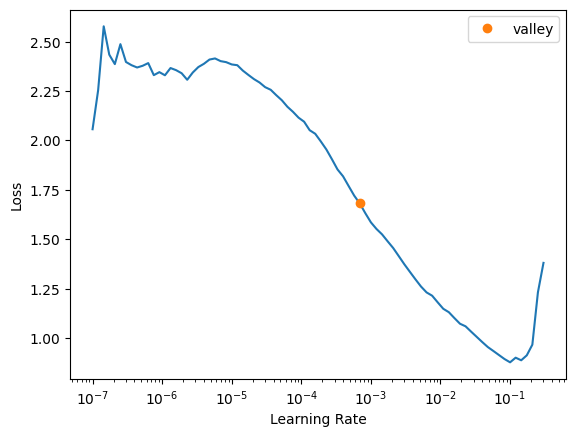

In [13]:
lr_suggested = learn.lr_find()
lr_valley = lr_suggested.valley

In [14]:
learn.fine_tune(5, lr_valley)

epoch,train_loss,valid_loss,error_rate,time
0,1.697862,0.229494,0.096774,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.624179,0.175667,0.064516,00:11
1,0.499784,0.122910,0.032258,00:11
2,0.369102,0.076540,0.016129,00:12
3,0.286154,0.056786,0.016129,00:12
4,0.243917,0.055513,0.016129,00:11


In [15]:
learn.export("model.pkl")

In [16]:
import ipywidgets as widgets
uploader = widgets.FileUpload()
uploader

FileUpload(value=(), description='Upload')

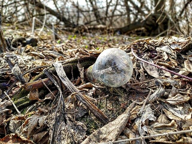

In [17]:
img_data = uploader.value[0]['content'].tobytes()
img = PILImage.create(img_data)
img.to_thumb(192)
# https://commons.wikimedia.org/wiki/File:Light_bulb_in_the_forest.jpg
# Maslov dima, CC BY 4.0 https://creativecommons.org/licenses/by/4.0, via Wikimedia Commons

In [28]:
# Predict
predicted_class, predicted_idx, probs = learn.predict(img)

# Print the predicted class
print(f"Predicted Class: {predicted_class}")

# Print the predicted class index
print(f"Predicted Class Index: {predicted_idx}")

# Print the probabilities for each category
# First, get the order from the vocab object (inside the dataloaders)
categories = learn.dls.vocab
categories
print("Class Probabilities:")
for i, prob in enumerate(probs):
    print(f"{categories[i]}: {prob:.4f} ({prob.item() * 100:.2f}%)")

Predicted Class: incandescent bulb
Predicted Class Index: 3
Class Probabilities:
CFL bulb: 0.0000 (0.00%)
LED bulb: 0.0000 (0.00%)
halogen bulb: 0.0000 (0.00%)
incandescent bulb: 0.9999 (99.99%)
